# Movie Recommendation System

### Importing the Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns

In [4]:
#pip install scikit-surprise


     -------------------------------------- 772.0/772.0 kB 9.8 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-win_amd64.whl size=1083860 sha256=3aa044d0365254d48749f4537b9b3b01fc3d64aee9d9ea23b4b9b5cfe50ae442
  Stored in directory: c:\users\prava\appdata\local\pip\cache\wheels\df\e4\a6\7ad72453dd693f420b0c639bedeec34641738d11b55d8d9b84
Successfully built scikit-surprise
Note: you may need to restart the kernel to use updated packages.


### Defining the csv file paths and loading them

In [3]:
from surprise import Dataset, Reader
from surprise.model_selection import train_test_split

column_names = ['moviesID','title','genres']

movies_data = pd.read_csv(r'C:\Users\prava\OneDrive\Documents\movies.csv')
rating_data = pd.read_csv(r'C:\Users\prava\OneDrive\Documents\ratings.csv')

print("Movies Data:")
print(movies_data.head())

print("\nRatings Data:")
print(rating_data.head())



Movies Data:
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  

Ratings Data:
   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931


## From here I will do some more analysis to show the trending movies and Calculate Popularity of movies

In [6]:
reader = Reader(rating_scale=(0.5, 5))  

data = Dataset.load_from_df(rating_data[['userId', 'movieId', 'rating']], reader)

trainset, testset = train_test_split(data, test_size=0.2)

In [7]:
def show_trending_movies(num_movies=10):
    most_rated_movies = rating_data['movieId'].value_counts().head(num_movies)
    trending_movies = movies_data[movies_data['movieId'].isin(most_rated_movies.index)]
    return trending_movies

In [9]:
def calculate_popularity():
    movie_popularity = rating_data['movieId'].value_counts()
    return movie_popularity

In [14]:
def find_highest_rated_movies(num_movies=10):
    average_ratings = rating_data.groupby('movieId')['rating'].mean()
    highest_rated_movie_ids = average_ratings.nlargest(num_movies).index
    highest_rated_movies = movies_data[movies_data['movieId'].isin(highest_rated_movie_ids)]
    return highest_rated_movies

In [11]:
trending_movies = show_trending_movies()
print("Trending Movies:")
print(trending_movies)


Trending Movies:
      movieId                                      title  \
97        110                          Braveheart (1995)   
224       260  Star Wars: Episode IV - A New Hope (1977)   
257       296                        Pulp Fiction (1994)   
277       318           Shawshank Redemption, The (1994)   
314       356                        Forrest Gump (1994)   
418       480                       Jurassic Park (1993)   
461       527                    Schindler's List (1993)   
507       589          Terminator 2: Judgment Day (1991)   
510       593           Silence of the Lambs, The (1991)   
1939     2571                         Matrix, The (1999)   

                                genres  
97                    Action|Drama|War  
224            Action|Adventure|Sci-Fi  
257        Comedy|Crime|Drama|Thriller  
277                        Crime|Drama  
314           Comedy|Drama|Romance|War  
418   Action|Adventure|Sci-Fi|Thriller  
461                          Drama|

In [12]:
popularity = calculate_popularity()
print("\nMovie Popularity:")
print(popularity)



Movie Popularity:
movieId
356       329
318       317
296       307
593       279
2571      278
         ... 
86279       1
86922       1
5962        1
87660       1
163981      1
Name: count, Length: 9724, dtype: int64


In [20]:
highest_rated_movies = find_highest_rated_movies()
print("\nHighest Rated Movies:")
print(highest_rated_movies)


Highest Rated Movies:
     movieId                                              title  \
48        53                                    Lamerica (1994)   
87        99               Heidi Fleiss: Hollywood Madam (1995)   
121      148                   Awfully Big Adventure, An (1995)   
405      467                             Live Nude Girls (1995)   
432      495  In the Realm of the Senses (Ai no corrida) (1976)   
433      496                        What Happened Was... (1994)   
531      626          Thin Line Between Love and Hate, A (1996)   
536      633                             Denise Calls Up (1995)   
666      876     Supercop 2 (Project S) (Chao ji ji hua) (1993)   
865     1140  Entertaining Angels: The Dorothy Day Story (1996)   

                            genres  
48                 Adventure|Drama  
87                     Documentary  
121                          Drama  
405                         Comedy  
432                          Drama  
433  Comedy|Drama

### Showing a  DIstrbution Plot

In [57]:
def plot_rating_distribution():
    plt.hist(rating_data['rating'], bins=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5], edgecolor='black')
    plt.xlabel('Rating')
    plt.ylabel('Frequency')
    plt.title('Rating Distribution')
    plt.xticks([1, 2, 3, 4, 5])
    plt.show()

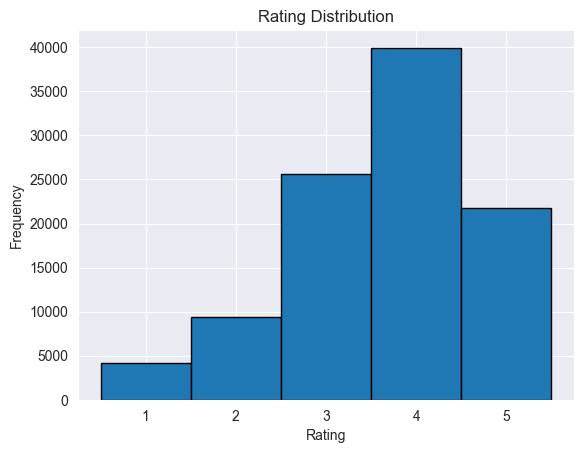

In [58]:
plot_rating_distribution()

### Analyze the relationship between popularity and average ratings

In [60]:
def analyze_popularity_vs_ratings():
    movie_popularity = calculate_popularity()
    average_ratings = rating_data.groupby('movieId')['rating'].mean()
    
    popularity_vs_ratings = pd.DataFrame({
        'Popularity': movie_popularity,
        'AverageRating': average_ratings
    })
    
    return popularity_vs_ratings

In [61]:
popularity_vs_ratings = analyze_popularity_vs_ratings()
print("\nPopularity vs. Average Ratings:")
print(popularity_vs_ratings)



Popularity vs. Average Ratings:
         Popularity  AverageRating
movieId                           
1               215       3.920930
2               110       3.431818
3                52       3.259615
4                 7       2.357143
5                49       3.071429
...             ...            ...
193581            1       4.000000
193583            1       3.500000
193585            1       3.500000
193587            1       3.500000
193609            1       4.000000

[9724 rows x 2 columns]


### Merging the movie and the rating dataset on the basis of 'movieId'

In [4]:
merged_movie = pd.merge(movies_data , rating_data , on='movieId')

merged_movie.head()


,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483


### Describing the merged data groupby title

In [5]:
merged_movie.groupby('title').describe()

movieId                           \
                                            count      mean  std       min   
title                                                                        
'71 (2014)                                    1.0  117867.0  NaN  117867.0   
'Hellboy': The Seeds of Creation (2004)       1.0   97757.0  NaN   97757.0   
'Round Midnight (1986)                        2.0   26564.0  0.0   26564.0   
'Salem's Lot (2004)                           1.0   27751.0  NaN   27751.0   
'Til There Was You (1997)                     2.0     779.0  0.0     779.0   
...                                           ...       ...  ...       ...   
eXistenZ (1999)                              22.0    2600.0  0.0    2600.0   
xXx (2002)                                   24.0    5507.0  0.0    5507.0   
xXx: State of the Union (2005)                5.0   33158.0  0.0   33158.0   
¡Three Amigos! (1986)                        26.0    2478.0  0.0    2478.0   
À nous la liberté (Freedom for Us) (1931)     1.0    5560.0  NaN    5560.0   

                                                                         \
                                                25%       50%       75%   
title                                                                     
'71 (2014)                                 117867.0  117867.0  117867.0   
'Hellboy': The Seeds of Creation (2004)     97757.0   97757.0   97757.0   
'Round Midnight (1986)                      26564.0   26564.0   26564.0   
'Salem's Lot (2004)                         27751.0   27751.0   27751.0   
'Til There Was You (1997)                     779.0     779.0     779.0   
...                                             ...       ...       ...   
eXistenZ (1999)                              2600.0    2600.0    2600.0   
xXx (2002)                                   5507.0    5507.0    5507.0   
xXx: State of the Union (2005)              33158.0   33158.0   33158.0   
¡Three Amigos! (1986)                        2478.0    2478.0    2478.0   
À nous la liberté (Freedom for Us) (1931)    5560.0    5560.0    5560.0   

                                                    userId              ...  \
                                                max  count        mean  ...   
title                                                                   ...   
'71 (2014)                                 117867.0    1.0  610.000000  ...   
'Hellboy': The Seeds of Creation (2004)     97757.0    1.0  332.000000  ...   
'Round Midnight (1986)                      26564.0    2.0  354.500000  ...   
'Salem's Lot (2004)                         27751.0    1.0  345.000000  ...   
'Til There Was You (1997)                     779.0    2.0  229.000000  ...   
...                                             ...    ...         ...  ...   
eXistenZ (1999)                              2600.0   22.0  389.954545  ...   
xXx (2002)                                   5507.0   24.0  272.916667  ...   
xXx: State of the Union (2005)              33158.0    5.0  386.000000  ...   
¡Three Amigos! (1986)                        2478.0   26.0  279.807692  ...   
À nous la liberté (Freedom for Us) (1931)    5560.0    1.0  527.000000  ...   

                                          rating      timestamp                \
                                             75%  max     count          mean   
title                                                                           
'71 (2014)                                 4.000  4.0       1.0  1.493850e+09   
'Hellboy': The Seeds of Creation (2004)    4.000  4.0       1.0  1.352671e+09   
'Round Midnight (1986)                     3.500  3.5       2.0  1.346507e+09   
'Salem's Lot (2004)                        5.000  5.0       1.0  1.342827e+09   
'Til There Was You (1997)                  4.500  5.0       2.0  1.161440e+09   
...                                          ...  ...       ...           ...   
eXistenZ (1999)                            4.375  5.0      22.

### Merged data grouped by 'title' and 'rating' mean 

In [16]:
merged_movie.groupby('title')['rating'].mean().head()

title
'71 (2014)                                 4.0
'Hellboy': The Seeds of Creation (2004)    4.0
'Round Midnight (1986)                     3.5
'Salem's Lot (2004)                        5.0
'Til There Was You (1997)                  4.0
Name: rating, dtype: float64

### Merged data grouped by "title" and "rating mean" sorted in descending order

In [17]:
merged_movie.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Gena the Crocodile (1969)              5.0
True Stories (1986)                    5.0
Cosmic Scrat-tastrophe (2015)          5.0
Love and Pigeons (1985)                5.0
Red Sorghum (Hong gao liang) (1987)    5.0
Name: rating, dtype: float64

### Merged data grouped by "title" and "rating", displayed by the count of ratings in descending order

In [19]:
merged_movie.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Forrest Gump (1994)                 329
Shawshank Redemption, The (1994)    317
Pulp Fiction (1994)                 307
Silence of the Lambs, The (1991)    279
Matrix, The (1999)                  278
Name: rating, dtype: int64

### Now We will define "movie_rating_mean_count" in this we will add both the count and mean of the movie ratings in the same table

In [22]:
movie_rating_mean_count = pd.DataFrame(columns=['rating_mean' , 'rating_count'])

movie_rating_mean_count['rating_mean'] = merged_movie.groupby('title')['rating'].mean()

movie_rating_mean_count['rating_count'] = merged_movie.groupby('title')['rating'].count()

movie_rating_mean_count.head()

,rating_mean,rating_count
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


### Now we will make a histogram based on the above data, so as to see how the average ratings are distributed

<Axes: >

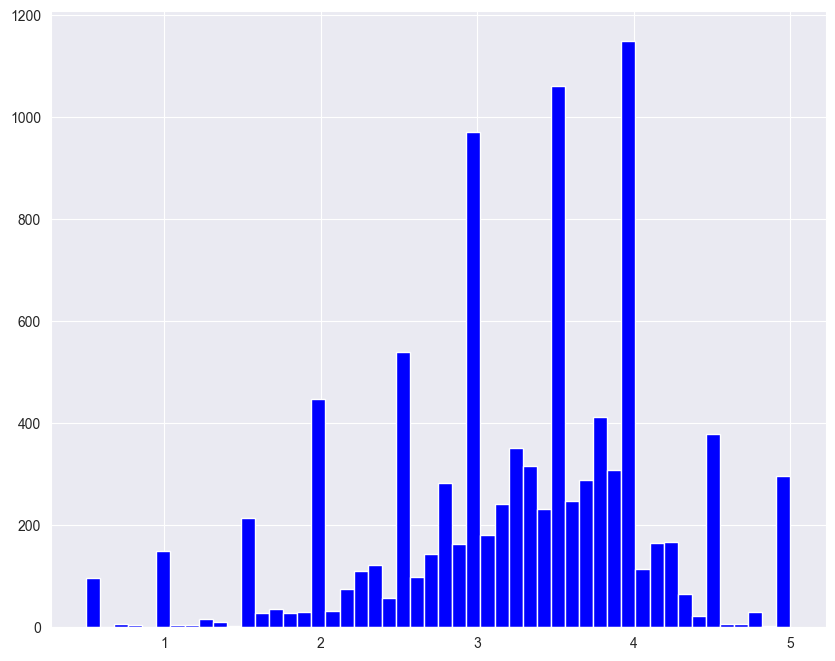

In [33]:
plt.figure(figsize=(10,8))
sns.set_style("darkgrid")

movie_rating_mean_count['rating_mean'].hist(bins=50, color='blue')

### Now we will make the distribution for the Ratings Count

<Axes: >

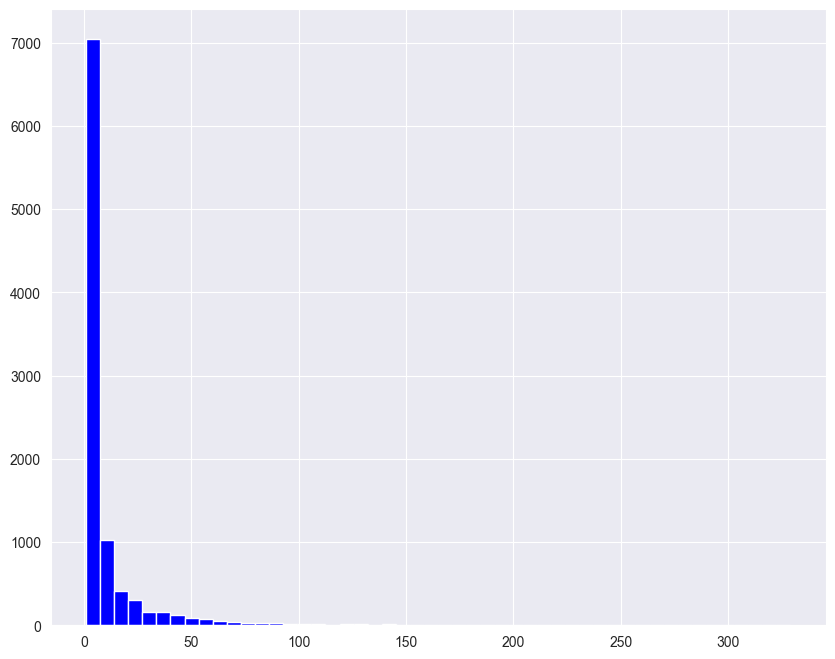

In [39]:
plt.figure(figsize=(10,8))
sns.set_style("darkgrid")

movie_rating_mean_count['rating_count'].hist(bins=50, color='blue')

We can see that there are more than 7000 movies with less than 10 rating counts , and there are very few movies with rating counts more than 50 

### Now Let's see the relationship between Rating_count and Rating_mean

<Axes: xlabel='rating_mean', ylabel='rating_count'>

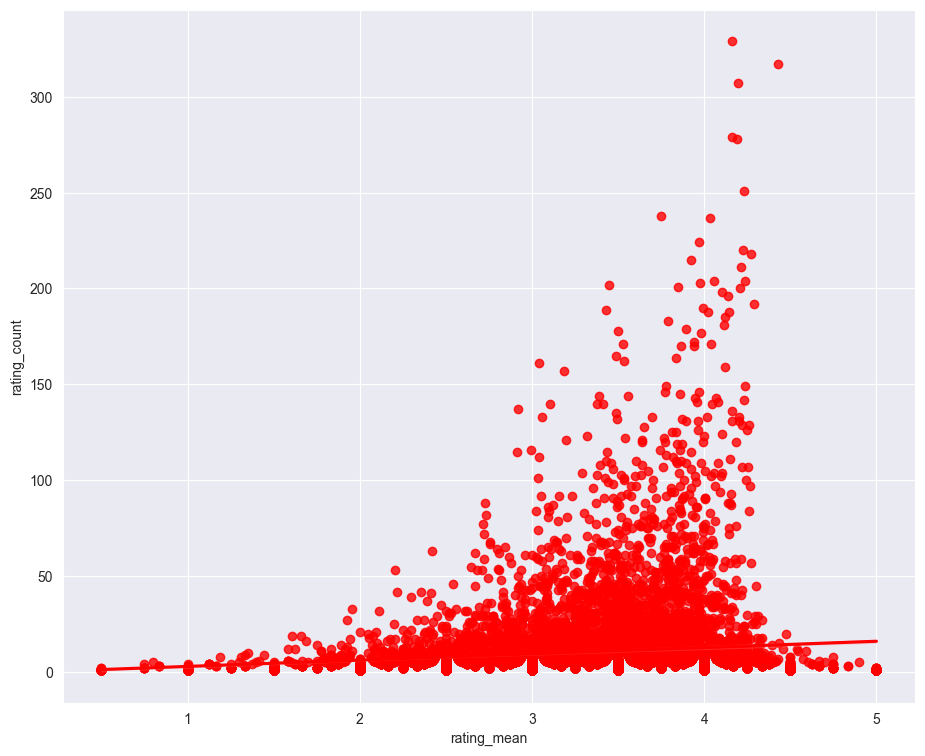

In [42]:
plt.figure(figsize=(11,9))
sns.set_style("darkgrid")

sns.regplot(x="rating_mean", y="rating_count", data=movie_rating_mean_count, color="red")

### Lets see the data  sort by "Rating Count" in the Descending Order 

In [43]:
movie_rating_mean_count.sort_values("rating_count" , ascending=False).head()

,rating_mean,rating_count
title,,
Forrest Gump (1994),4.164134,329
"Shawshank Redemption, The (1994)",4.429022,317
Pulp Fiction (1994),4.197068,307
"Silence of the Lambs, The (1991)",4.161290,279
"Matrix, The (1999)",4.192446,278


### Let's See the data sort by "Rating Mean" in the Descending Order

In [44]:
movie_rating_mean_count.sort_values("rating_mean" , ascending=False).head()

,rating_mean,rating_count
title,,
Gena the Crocodile (1969),5.0,1
True Stories (1986),5.0,1
Cosmic Scrat-tastrophe (2015),5.0,1
Love and Pigeons (1985),5.0,1
Red Sorghum (Hong gao liang) (1987),5.0,1


## NEW DATAFRAME for Item Based Collaborative Filtering

Let's make a dataframe where each movie is represented by a column and row contains user ratings for movies

In [45]:
movie_rating_matrix = merged_movie.pivot_table(index="userId", columns="title" ,values="rating")

movie_rating_matrix

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.5,3.5,NaN,NaN,NaN


In [46]:
movie_rating_matrix.shape

(610, 9719)

As we can determine that the dataset contains: 
    610 Unique users and 9719 unique movies

Now lets do movie recommendation based on single and multiple movies

For Single Movie - lets take the example of Shawshank Redemption

We will filter the columns based on the movie ratings by users

In [47]:
Shawshank_Redemption_ratings = movie_rating_matrix["Shawshank Redemption, The (1994)"]

Now the correlation between other movies and Shawshank Redemption 

In [49]:
Shawshank_Redemption_correlations = pd.DataFrame(movie_rating_matrix.corrwith(Shawshank_Redemption_ratings), columns=["pf_corr"])

In [50]:
Shawshank_Redemption_correlations.sort_values("pf_corr",ascending=False).head()

,pf_corr
title,
"Principal, The (1987)",1.0
Chi-Raq (2015),1.0
Rififi (Du rififi chez les hommes) (1955),1.0
Robot & Frank (2012),1.0
Rock Star (2001),1.0


#### Now we will add Rating count to get more meaningful result

In [51]:
Shawshank_Redemption_correlations = Shawshank_Redemption_correlations.join(movie_rating_mean_count["rating_count"])

Shawshank_Redemption_correlations.head()

,pf_corr,rating_count
title,,
'71 (2014),NaN,1
'Hellboy': The Seeds of Creation (2004),NaN,1
'Round Midnight (1986),NaN,2
'Salem's Lot (2004),NaN,1
'Til There Was You (1997),NaN,2


### Let's Remove the NULL values

In [52]:
Shawshank_Redemption_correlations.dropna(inplace=True)

In [53]:
Shawshank_Redemption_correlations.sort_values("pf_corr", ascending=False).head()

,pf_corr,rating_count
title,,
"Principal, The (1987)",1.0,2
Chi-Raq (2015),1.0,2
Rififi (Du rififi chez les hommes) (1955),1.0,2
Robot & Frank (2012),1.0,3
Rock Star (2001),1.0,3


### Now We will add rating counts which are more 50 to get the highest correlation with Shawshank Redemption, The (1994

In [54]:
Shawshank_Redemption_correlations_50 = Shawshank_Redemption_correlations[Shawshank_Redemption_correlations['rating_count']>50]

Shawshank_Redemption_correlations_50.sort_values("pf_corr", ascending=False).head()

,pf_corr,rating_count
title,,
"Shawshank Redemption, The (1994)",1.000000,317
Rear Window (1954),0.545149,84
My Cousin Vinny (1992),0.523016,59
Bad Boys (1995),0.516762,51
City of God (Cidade de Deus) (2002),0.486670,75
